In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import scipy as sp

import geopandas as gpd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_map = gpd.read_file('/Users/lindenmp/Dropbox/PersonalProjects/NASA_aus_firedata/data/my_map.shp')

In [3]:
df = gpd.read_file('/Users/lindenmp/Dropbox/PersonalProjects/NASA_aus_firedata/data/df_postcode.shp')
df.shape

(450028, 17)

In [4]:
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,postcode,geometry
0,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,2358,POINT (151.29510 -30.58630)
1,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,2358,POINT (151.29680 -30.57730)
2,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,2355,POINT (151.14380 -30.77540)
3,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,2365,POINT (151.74220 -30.35600)
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,2825,POINT (147.06320 -31.55400)


Add some columns that denote year and month

In [5]:
df['year'] = pd.DatetimeIndex(df['ACQ_DATE']).year
df['month'] = pd.DatetimeIndex(df['ACQ_DATE']).month

Check we have a full years data for each year

In [6]:
num_months = np.zeros(len(df['year'].unique()),)

for i, year in enumerate(df['year'].unique()):
    num_months[i] = len(df.loc[df['year'] == year,'month'].unique())

Text(0, 0.5, 'Counts')

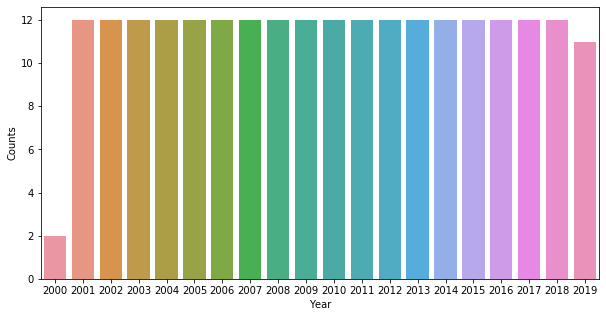

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = df['year'].unique(),
            y = num_months, ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Counts')

Nope, drop year 2000

In [8]:
# drop year 2000
df = df.loc[df['year'] > 2000,:]

In [9]:
# What's going on for 2019? - Missing october..
df.loc[df['year'] == 2019,'month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12])

# Exploratory data analysis

Text(0, 0.5, 'Counts')

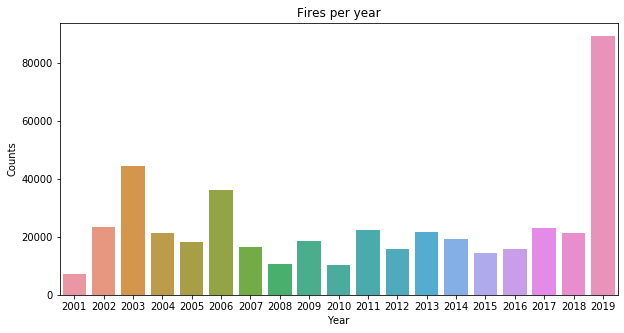

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = df['year'].value_counts().index,
            y = df['year'].value_counts().values, ax = ax)
ax.set_title('Fires per year')
ax.set_xlabel('Year')
ax.set_ylabel('Counts')

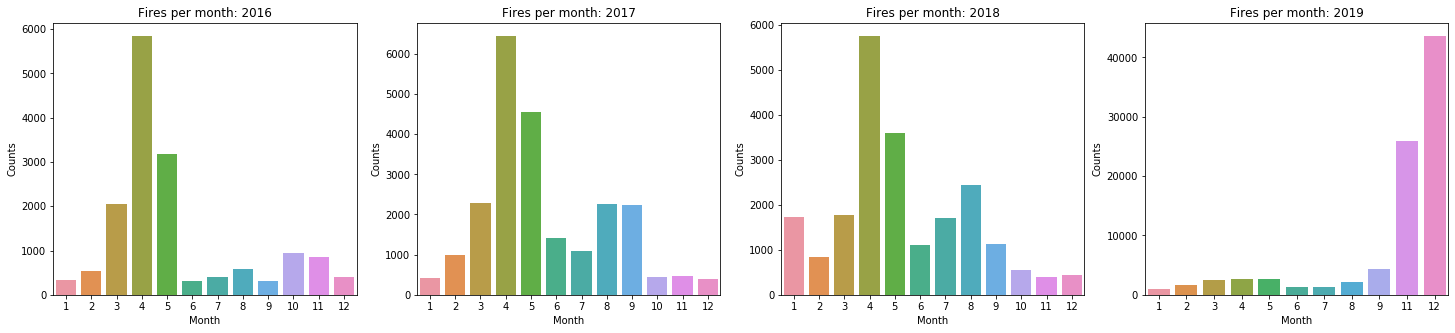

In [11]:
years = (2016, 2017, 2018, 2019)
fig, ax = plt.subplots(1,4, figsize = (25,5))
for i, year in enumerate(years):
    sns.barplot(x = df.loc[df['year'] == year,'month'].value_counts().index,
                y =df.loc[df['year'] == year,'month'].value_counts().values, ax = ax[i])
    ax[i].set_title('Fires per month: ' + str(year))
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Counts')

## Spatial plots

Plot the fires on Dec 31st 2019, during the big surge of bushfires

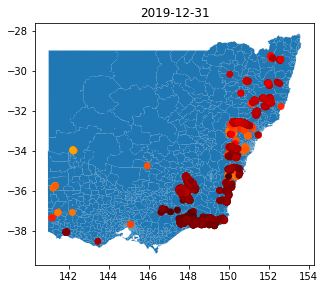

In [12]:
my_date = df['ACQ_DATE'].unique()[-1]
fig, ax = plt.subplots(figsize = (5,5))
ax.set_title(my_date)
my_map.plot(ax = ax)
df[df['ACQ_DATE'] == my_date].plot(ax = ax, column='BRIGHT_T31', cmap='hot')

Let's look over a period of years, normalized by number of fires across the same period

In [13]:
years = (2016, 2017, 2018, 2019)
num_fires = np.zeros(1,)
for year in years:
    num_fires = num_fires + df.loc[df['year'] == year,:].shape[0]

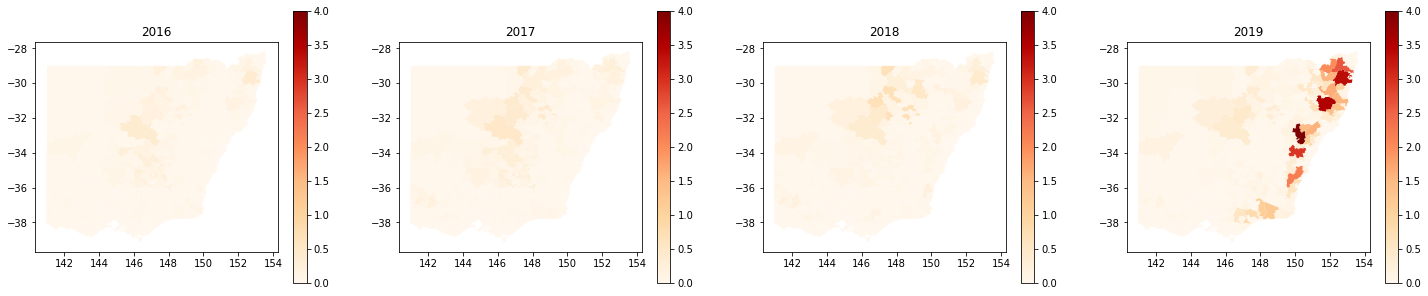

In [14]:
fig, ax = plt.subplots(1,4, figsize = (25,5))
for i, year in enumerate(years):
    counts = df.loc[df['year'] == year,'postcode'].value_counts()

    my_map['counts'] = np.zeros(my_map.shape[0],)

    for postcode in counts.index:
        my_map.loc[my_map['code'] == postcode, 'counts'] = counts[postcode] / num_fires * 100

    ax[i].set_title(year)
    my_map.plot(ax = ax[i], column = 'counts', cmap='OrRd', vmax = 4, legend=True)